## Στοιχεία Ομάδας

Αριθμός Ομάδας: F05

    > Καρυπιάδης Ευστράτιος: 03114911
    > Σταματελόπουλος Νικόλαος: 03116138

---

## Reading, Resizing and Combining

Θα ξεκινήσπυμε διαβάζοντας τις εικόνες προσώπων, κάθε μία από τις οποίες θα προσαρμόσουμε σε διαστάσεις `(512, 256)` με χρήση της συνάρτησης `resize`. Καταλήξαμε στις συγκεκριμένες διαστάσεις με σκοπό να μην αλλοιώσουμε τη γεωμετρία των προσώπων, έτσι ώστε να καταλήξουμε σε ένα αισθητικά ευχάριστο αποτέλεσμα cartoonification.
 
Στη συνέχεια θα τις συνθέσουμε σε μία κοινή εικόνα με βοήθεια της συνάρτησης `numpy.concatenate`.

In [0]:
import skimage
import numpy as np
from skimage import io
from skimage.transform import resize
from matplotlib import pyplot as plt
from skimage import img_as_float, img_as_ubyte

# Reading image files
face_image1 = img_as_float(io.imread('3.jpg'))
face_image2 = img_as_float(io.imread('4.jpg'))

# # Rescaling to desired dimensions
face_image1_resized = resize(face_image1, (512, 256), anti_aliasing=True)
face_image2_resized = resize(face_image2, (512, 256), anti_aliasing=True)

# Concatinating horizontally to one image
final_image = np.concatenate((face_image1_resized, face_image2_resized), axis=1)

---

## Color Space

Για χρωματικό χώρο επίλεγουμε τον [HSV](https://bit.ly/2Auy7Ml). Η επιλογή μας βασίζεται κυρίως σε επιστημονικές [δημοσιεύσεις](https://bit.ly/3dOLUMc), οι οποίες καταλήγουν ότι ο συγκεκριμένος χρωματικός χώρος είναι ιδανικός για την ανίχνευση ακμών σε έγχρωμες εικόνες. Η λογική είναι ότι θα χρησιμοποιήσουμε και τις τρεις διαστάσεις του χώρου, για να ανιχνεύσουμε χρήσιμες ακμές που εξυπηρετούν την εφαρμογή μας.

Αξίζει να παρατηρήσουμε ότι η τρίτη διάσταση, *Value*, του συγκεκριμένου χώρου θα μπορούσε να θεωρηθεί ισοδύναμη με την εικόνα μας σε ασπρόμαυρες αποχρώσεις, μία μορφή που ενδείκνυται για ανίχνευση ακμών. 

In [0]:
from skimage import color

# Selecting HSV color space
final_image_hsv = color.rgb2hsv(final_image)

---

## Adding Noise

Θα προσθέσουμε δύο ειδών θορύβου στην εικόνα μας, για να παράξουμε δύο νέες εικόνες, στις οποίες θα βασιστούμε για τη συνέχεια της άσκησης. Πιο συγκεκριμένα, θα προσθέσουμε Gaussian και Salt & Pepper θόρυβο.

In [0]:
from skimage.util import random_noise

def snpAmount(digit):
  return 1/90*digit + 0.3 

# Adding noise
gaussian_image = random_noise(final_image_hsv, mode='gaussian', seed=8) # selecting 8 from 03116138
saltpepper_image = random_noise(final_image_hsv, mode='s&p', seed=42, amount=snpAmount(8)) # selecting 8 from 03116138

---

## Filtering

Για αποθορυβοποίηση των εικόνων μας θα δοκιμάσουμε τρία διαφορετικά φίλτρα: Mean, Gaussian και Median. Επειδή οι εικόνες με τις οποίες δουλεύουμε είναι 3 διαστάσεων, σημειώνουμε ότι η αποθορυβοποίηση λαμβάνει χώρα και στα 3 κανάλια της εικόνας, τα εκάστοτε αποτελέσματα της οποίας συνθέτουμε σε μία τελική εικόνα με χρήση της συνάρτησης `numpy.dstack`. 

Για οπτικοποίηση των αποτελεσμάτων μας υλοποιούμε τη συνάρτηση `imcmp`, η οποία έχει ως στόχο να συγκρίνει, τουλάχιστον οπτικά, την αποδοτικότητα των φίλτρων που θα δοκιμάσουμε.

In [0]:
def imcmp(image_set, title_set, cmap=None):

  fig, axes = plt.subplots(1, 5, figsize=(20, 10))
  for ax in axes:
    ax.axis('off') # discard axes
  
  (ax_1, ax_2, ax_3, ax_4, ax_5) = axes

  if cmap:
    ax_1.imshow(image_set[0], cmap='gray')
    ax_2.imshow(image_set[1], cmap='gray')
    ax_3.imshow(image_set[2], cmap='gray')
    ax_4.imshow(image_set[3], cmap='gray')
    ax_5.imshow(image_set[4], cmap='gray')
  else:
    # Convert from HSV to RBG before plotting
    ax_1.imshow(color.hsv2rgb(image_set[0]))
    ax_2.imshow(color.hsv2rgb(image_set[1]))
    ax_3.imshow(color.hsv2rgb(image_set[2]))
    ax_4.imshow(color.hsv2rgb(image_set[3]))
    ax_5.imshow(color.hsv2rgb(image_set[4]))

  # Set titles
  ax_1.set_title(title_set[0])
  ax_2.set_title(title_set[1])
  ax_3.set_title(title_set[2])
  ax_4.set_title(title_set[3])
  ax_5.set_title(title_set[4])

Στη συνέχεια ακολουθούν δοκιμές των παραπάνω φίλτρων μεταβάλλοντας τις αντίστοιχες εκάστοτε παραμέτρους.

In [0]:
from scipy import ndimage
from skimage import filters
from skimage.morphology import disk

### Gaussian Noise Image

#### Mean filter

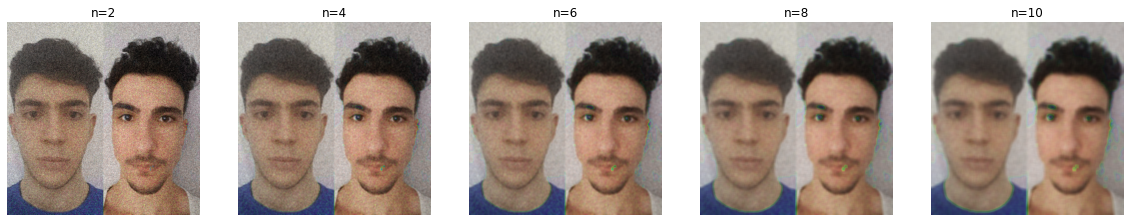

In [6]:
acc = []
for n in [2, 4, 6, 8, 10]:
  mean_kernel = np.full((n, n), 1/(n*n))
  mean_filteredH = ndimage.convolve(gaussian_image[:, :, 0], mean_kernel) # filtering dimension H
  mean_filteredS = ndimage.convolve(gaussian_image[:, :, 1], mean_kernel) # filtering dimension S
  mean_filteredV = ndimage.convolve(gaussian_image[:, :, 2], mean_kernel) # filtering dimension V
  mean_filtered_gaussian = np.dstack((mean_filteredH, mean_filteredS, mean_filteredV)) # combine filtered dimensions to HSV result
  acc.append(mean_filtered_gaussian)

imcmp(acc, ['n=2', 'n=4', 'n=6', 'n=8', 'n=10'])

Παρατηρώντας τα παραπάνω αποτελέσματα, μπορούμε να καταλήξουμε ότι σε καμία από τις περιπτώσεις που εξετάσαμε δεν έχουμε ικανοποιητική απομάκρυνση θορύβου. Εκτός αυτού, αξίζει να παρατηρήσουμε ότι όσο αυξάνουμε το μέγεθος του φίλτρου που συνελίσσεται με την εικόνα μας πέφτει και η ποιότητα του εξαγόμενης εικόνας, η οποία χαρακτηρίζεται από χρωματικά *artifacts* και θολές περιοχές. 

#### Gaussian filter

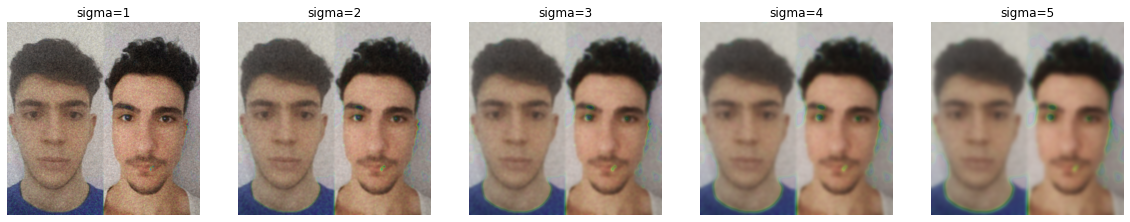

In [7]:
acc = []
for sigma in [1, 2, 3, 4, 5]:
  gaus_filteredH = filters.gaussian(gaussian_image[:, :, 0], sigma) # filtering dimension H
  gaus_filteredS = filters.gaussian(gaussian_image[:, :, 1], sigma) # filtering dimension S
  gaus_filteredV = filters.gaussian(gaussian_image[:, :, 2], sigma) # filtering dimension V
  gaus_filtered_gaussian = np.dstack((gaus_filteredH, gaus_filteredS, gaus_filteredV)) # combine filtered dimensions to HSV result
  acc.append(gaus_filtered_gaussian)

imcmp(acc, ['sigma=1', 'sigma=2', 'sigma=3', 'sigma=4', 'sigma=5'])

Στην περίπτωση του Γκαουσιανού φίλτρου, ενώ έχουμε σχετικά θολό αποτέλεσμα εξόδου, παρατηρούμε ότι η απομάκρυνση του θορύβου είναι αποδοτική. Συγκεκριμένα, για `sigma=2`, έχουμε ένα ικανοποιητικό αποτέλεσμα.

Παρατηρούμε ωστόσο ότι στην εικόνα μας περιέχονται χρωματικά *artifacts*. Για να ξεπεράσουμε το συγκεκριμένο πρόβλημα, μπορούμε να εκμεταλλευτούμε μόνο τη διάσταση V, της εικόνας, η οποία, όπως αναφέραμε και παραπάνω, συνάδει με `grayscale` χρωματικό χώρο. Παρακάτω παρουσιάζουμε τα αντίστοιχα αποτελέσματα:

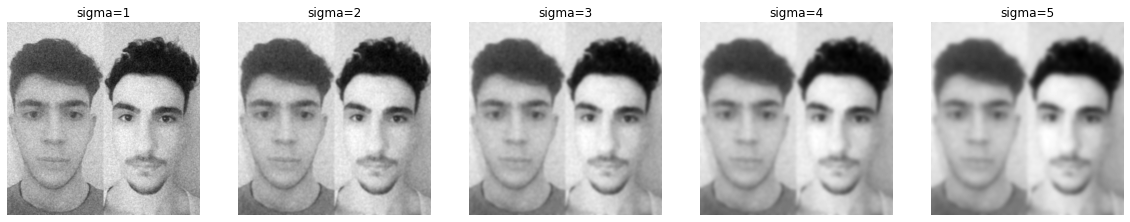

In [8]:
acc = []
for sigma in [1, 2, 3, 4, 5]:
  gaus_filteredV = filters.gaussian(gaussian_image[:, :, 2], sigma) # filtering dimension V
  acc.append(gaus_filteredV)

imcmp(acc, ['sigma=1', 'sigma=2', 'sigma=3', 'sigma=4', 'sigma=5'], cmap='gray')

#### Median filter

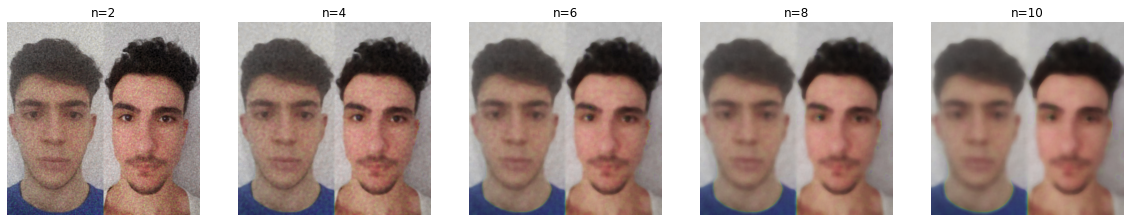

In [9]:
acc = []
for n in [2, 4, 6, 8, 10]:
  neighborhood = disk(n)
  median_filteredH = filters.rank.median(img_as_ubyte(gaussian_image[:, :, 0]), neighborhood) # filtering dimension H
  median_filteredS = filters.rank.median(img_as_ubyte(gaussian_image[:, :, 1]), neighborhood) # filtering dimension S
  median_filteredV = filters.rank.median(img_as_ubyte(gaussian_image[:, :, 2]), neighborhood) # filtering dimension V
  median_filtered_gaussian = img_as_float(np.dstack((median_filteredH, median_filteredS, median_filteredV))) # combine filtered dimensions to HSV result
  acc.append(median_filtered_gaussian)

imcmp(acc, ['n=2', 'n=4', 'n=6', 'n=8', 'n=10'])

Το φίλτρο μέσου όρου θα μπορούσαμε να πούμε ότι παρουσιάζει παρόμοια συμπεριφορά και αποτελέσματα με εκείνα του Γκαουσιανού. Πιο συγκεκριμένα, για δίσκο ακτίνας 6 η απομάκρυνση θορύβου είναι ικανοποιητική, εάν εξαιρέσουμε και πάλι τα *artifacts* που προκύπτουν.

Προς σύγκριση των δύο φίλτρων θα παράξουμε και εδώ τη συμπεριφορά του φίλτρου μόνο στη διάσταση V του χώρου HSV:

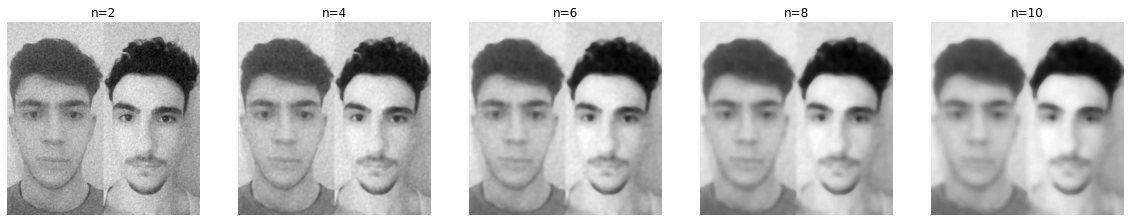

In [10]:
acc =[]
for n in [2, 4, 6, 8, 10]:
  neighborhood = disk(n)
  median_filteredV = filters.rank.median(img_as_ubyte(gaussian_image[:, :, 2]), neighborhood) # filtering dimension V
  acc.append(median_filteredV)

imcmp(acc, ['n=2', 'n=4', 'n=6', 'n=8', 'n=10'], cmap='gray')

Λαμβάνοντας όλα τα παραπάνω υπόψιν, το φίλτρο το οποίο επιλέγουμε να χρησιμοποιήσουμε για αποθορυβοποίηση του Γκαουσιανού θορύβου είναι το Γκαουσιανό φίλτρο για `sigma=2`. Σημειώνουμε ότι κατά την αποθορυβοποίηση χρησιμοποιήσαμε **μόνο** τη διάσταση V της εικόνας εισόδου μας και στη συνέχεια της άσκησης θα δουλέψουμε μόνο στη συγκεκριμένη διάσταση.

Σημειώνουμε, τέλος, ότι κατά την παραπάνω διαδικασία θυσιάσαμε μέρος της ποιότητας της εικόνας, για απομάκρυνση του θορύβου.

In [0]:
gaussian_final = filters.gaussian(gaussian_image[:, :, 2], sigma=2) # final gaussian-noise image

### Salt & Pepper Noise Image

#### Mean filter

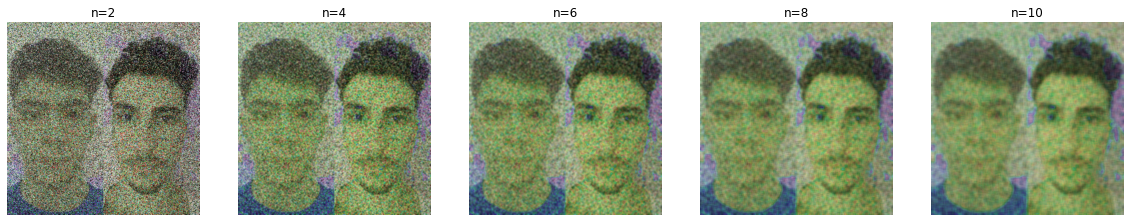

In [12]:
acc = []
for n in [2, 4, 6, 8, 10]:
  mean_kernel = np.full((n, n), 1/(n*n))
  mean_filteredH = ndimage.convolve(saltpepper_image[:, :, 0], mean_kernel)
  mean_filteredS = ndimage.convolve(saltpepper_image[:, :, 1], mean_kernel)
  mean_filteredV = ndimage.convolve(saltpepper_image[:, :, 2], mean_kernel)
  mean_filtered_snp = np.dstack((mean_filteredH, mean_filteredS, mean_filteredV))
  acc.append(mean_filtered_snp)

imcmp(acc, ['n=2', 'n=4', 'n=6', 'n=8', 'n=10'])

Το πρώτο χαρακτηριστικό που παρατηρούμε για τις εικόνες εξόδου μας, είναι ότι υπάρχουν αλλοιώσεις στο χρωματικό τους χώρο. Αυτή η συμπεριφορά αποδίδεται στη διακριτή αντιμετώπιση των εκάστοτε καναλιών της εικόνας, η σύνθεση των οποίων μεταβάλλει αισθητά το χρωματικό τους αποτέλεσμα. Σε κάθε περίπτωση, ωστόσο, μπορούμε να διακρίνουμε ότι σε καμία από τις παραπάνω περιπτώσεις δεν έχουμε απομακρύνει ικανοποιητικά τον Salt 'n Pepper θόρυβο.

#### Gaussian filter

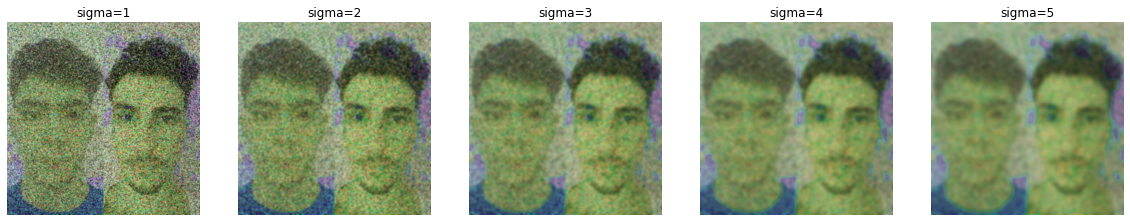

In [13]:
acc = []
for sigma in [1, 2, 3, 4, 5]:
  gaus_filteredH = filters.gaussian(saltpepper_image[:, :, 0], sigma)
  gaus_filteredS = filters.gaussian(saltpepper_image[:, :, 1], sigma)
  gaus_filteredV = filters.gaussian(saltpepper_image[:, :, 2], sigma)
  gaus_filtered_snp = np.dstack((gaus_filteredH, gaus_filteredS, gaus_filteredV))
  acc.append(gaus_filtered_snp)

imcmp(acc, ['sigma=1', 'sigma=2', 'sigma=3', 'sigma=4', 'sigma=5'])

Το Γκαουσιανό φίλτρο παρουσιάζει παρόμοια συμπεριφορά με το φίλτρο μέσης τιμής που μελετήσαμε παραπάνω. Ο χρωματικός χώρος των εικόνων εξόδου είναι αλλοιωμένος, με την αύξηση του `sigma` έχουμε όλο και πιο θολό αποτέλεσμα, ενώ σε καμία περίπτωση δεν έχουμε απομάκρυνση του θορύβου.

#### Median filter

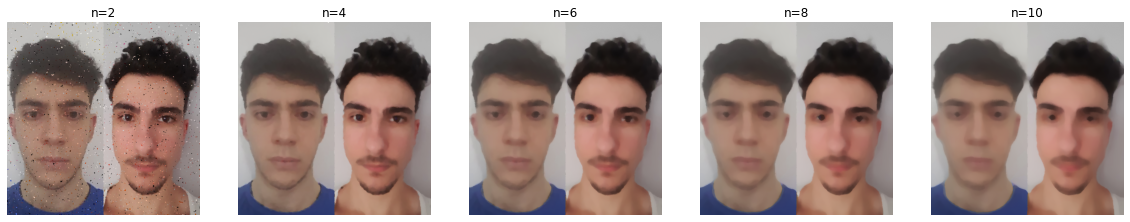

In [14]:
acc = []
for n in [2, 4, 6, 8, 10]:
  neighborhood = disk(n)
  median_filteredH = filters.rank.median(img_as_ubyte(saltpepper_image[:, :, 0]), neighborhood)
  median_filteredS = filters.rank.median(img_as_ubyte(saltpepper_image[:, :, 1]), neighborhood)
  median_filteredV = filters.rank.median(img_as_ubyte(saltpepper_image[:, :, 2]), neighborhood)
  median_filtered_snp = img_as_float(np.dstack((median_filteredH, median_filteredS, median_filteredV)))
  acc.append(median_filtered_snp)

imcmp(acc, ['n=2', 'n=4', 'n=6', 'n=8', 'n=10'])

Σε αντίθεση με τα προηγούμενα φίλτρα που εξετάσαμε, το φίλτρο μέσου όρου παράγει εξαιρετικά ικανοποιητικά αποτελέσματα. Πιο συγκεκριμένα, για δίσκο ακτίνας 4, η εικόνα εξόδου έχει αποθορυβοποιηθεί πλήρως, χωρίς να υπάρξει σημαντική πτώση της ποιότητάς της.

Λαμβάνοντας, λοιπόν, υπόψιν όλα τα παραπάνω αποτελέσματά μας, θα χρησιμοποιήσουμε το φίλτρο μέσου όρου για αποθορυβοποίηση της εικόνας εμπλουτισμένη με Salt & Pepper θόρυβο.

In [0]:
saltpepper_final = acc[1] # final salt&pepper-noise image

---

## Edge Detection

Για την ανίχνευση ακμών θα χρησιμοποιήσουμε τρία διαφορετικά φίλτρα: Laplacian, Canny και Marr-Hildreth. Όπως και στις μεθόδους αποκωδικοποίσης θα εφαρμόσουμε την ανίνχευση και στις 3 διαστάσεις, εμφανίζοντας τα απότελεσματα τις εκάστοτε διάστασης με διαφορετικό χρώμα.

In [0]:
from scipy import signal
from skimage import feature
from skimage.filters import laplace, sobel


def cartoonify(image, method, sigma=None, H_only=False):
  
    """
    Summary:
    -----------
    Cartoonifies image given by replacing detected edges with black color. Input image is remained
    unchanged. Edge detection follows one of three available methods.
    
    Parameters:
    -----------
    image : numpy.ndarray, image on HSV colorspace
    method : string, edge detection method: laplacian, canny, marr-hildreth, sobel
    sigma : float, default = None, sigma value for canny method

    Returns:
    -----------
    RBG-image with detected edges on each dimension, cartoonified input image
    """

    if method == "laplacian":
      laplacian_kernel = [[-1,-1,-1],[-1, 8, -1],[-1,-1,-1]]
      edges_H = np.clip(signal.convolve2d(image[:, :, 0], laplacian_kernel, mode="same"), 0, 255)
      edges_H = np.where(edges_H > 0.25, True, False)
      edges_S = np.clip(signal.convolve2d(image[:, :, 1], laplacian_kernel, mode="same"), 0, 255)
      edges_S = np.where(edges_S > 0.25, True, False)
      edges_V = np.clip(signal.convolve2d(image[:, :, 2], laplacian_kernel, mode="same"), 0, 255)
      edges_V = np.where(edges_V > 0.05, True, False)

    elif method == "canny":
      if sigma is None:
        raise ValueError("Please select a sigma value.")
      edges_H = feature.canny(image[:, :, 0], sigma=sigma)
      edges_S = feature.canny(image[:, :, 1], sigma=sigma)
      edges_V = feature.canny(image[:, :, 2], sigma=sigma)

    elif method == "marr-hildreth":
      if sigma is None:
        raise ValueError("Please select a sigma value.")
      edges_H = np.zeros((512, 512)).astype(bool) # only using the value dimension for edge detection
      edges_S = np.zeros((512, 512)).astype(bool) # only using the value dimension for edge detection
      edges_V = np.clip(ndimage.gaussian_laplace(image[:, :, 2], sigma=sigma), 0, 255)
      edges_V = np.where(edges_V > 0.0005, True, False)

    else:
      raise ValueError("Please chose ONE of the available methods: laplacian, canny, marr-hildreth.")

    # Reflect edges detected on a black panel (H/R, S/G, V/B)
    edges = img_as_ubyte(np.zeros((512, 512)))
    edges = np.dstack((edges, edges, edges))
    edges[edges_H, :] = [255, 0, 0]
    edges[edges_S, :] = [0, 255, 0]
    edges[edges_V, :] = [0, 0, 255]

    # Creating cartoonified image
    cartoon = np.copy(image)
    cartoon[edges_H, :] = [0, 0, 0]
    cartoon[edges_S, :] = [0, 0, 0]
    cartoon[edges_V, :] = [0, 0, 0]

    # Plotting original image, edges detected and cartoonification result
    fig, axes = plt.subplots(1, 3, figsize=(20, 15))
    for ax in axes:
      ax.axis('off')
    (ax_original, ax_edges, ax_cartoon)  = axes
    ax_original.imshow(color.hsv2rgb(image))
    ax_original.set_title('Original Denoised Image')
    ax_edges.imshow(edges)
    ax_edges.set_title('Edges Detected')
    ax_cartoon.imshow(color.hsv2rgb(cartoon))
    ax_cartoon.set_title('Cartoonified Image')

    # return (edges, cartoon)

### LaPlacian

#### Gaussian Noise Image

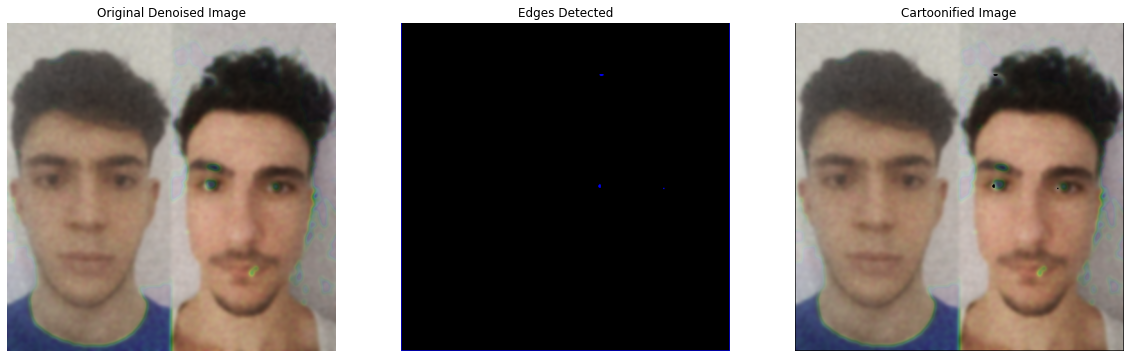

In [136]:
cartoonify(gaussian_final, "laplacian")

#### Salt & Pepper Noise Image

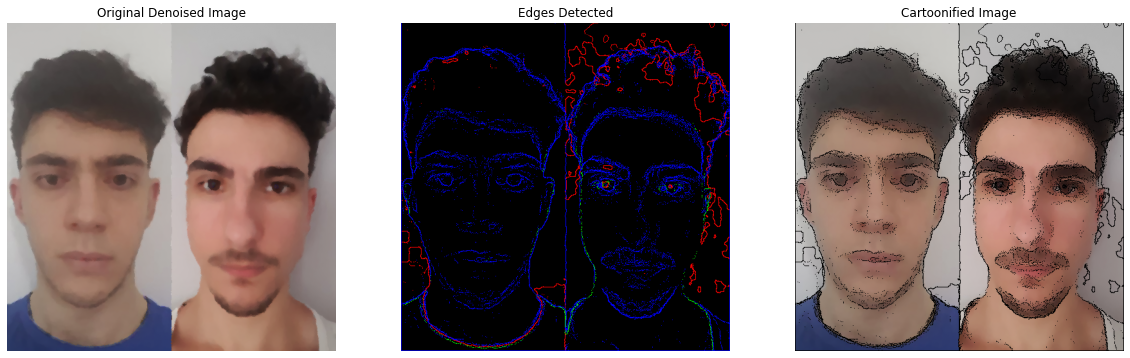

In [129]:
cartoonify(saltpepper_final, "laplacian")

### Canny

#### Gaussian Noise Image

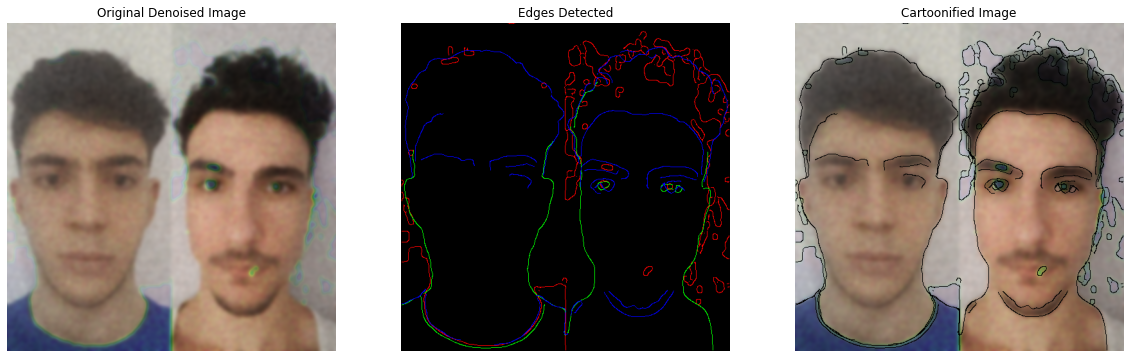

In [137]:
cartoonify(gaussian_final, "canny", 2)

#### Salt & Pepper Noise Image

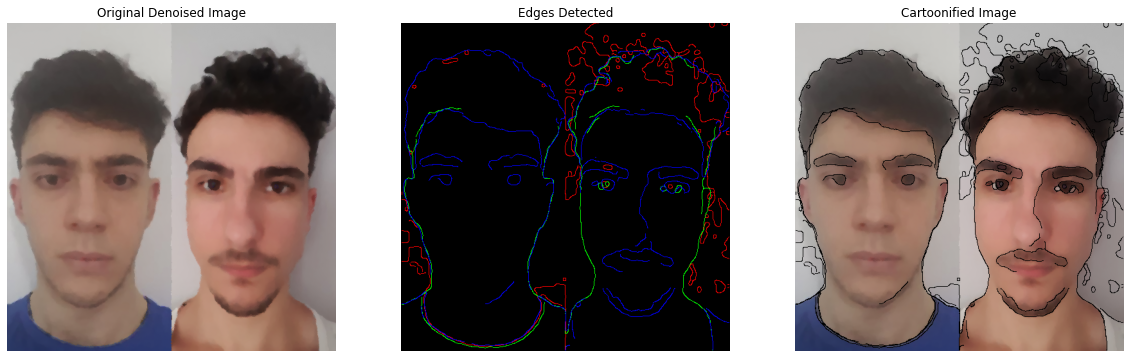

In [131]:
cartoonify(saltpepper_final, "canny", 2)

### Marr-Hildreth

#### Gaussian Noise Image

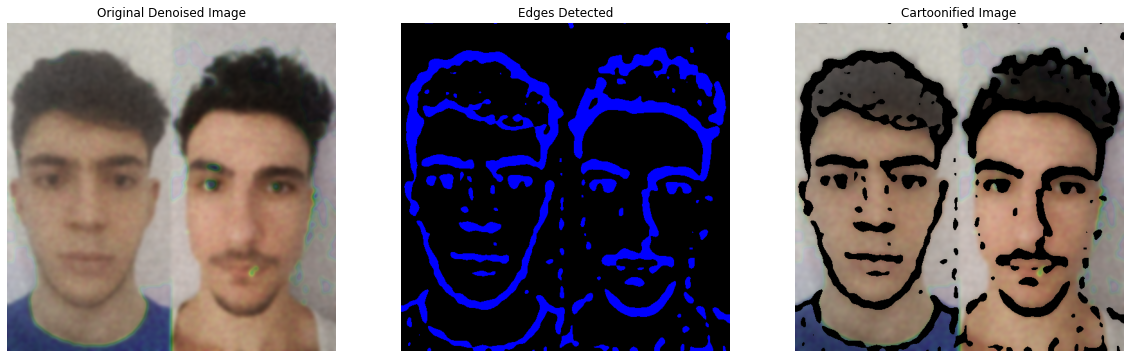

In [138]:
cartoonify(gaussian_final, method="marr-hildreth", sigma=5)

#### Salt & Pepper Noise Image

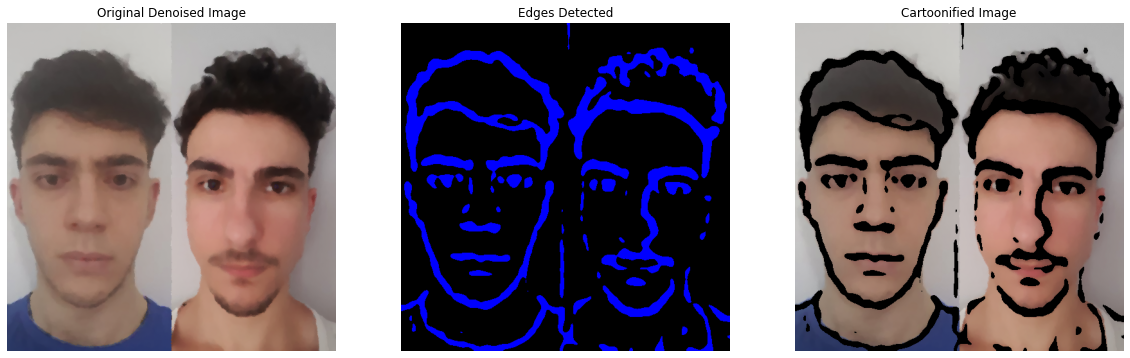

In [133]:
cartoonify(saltpepper_final, method="marr-hildreth", sigma=5)